In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import wb 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Download data using pandas_datareader

Download gdp per capita data and electricity power consumption per capita data from world bank.
Then merge them togther.

In [2]:
wb.search('gdp.*capita')

,id,name,source,sourceNote,sourceOrganization,topics,unit
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth,
5138,FB.DPT.INSU.PC.ZS,Deposit insurance coverage (% of GDP per capita),WDI Database Archives,,b'',,
8817,NE.GDI.FTOT.CR,GDP expenditure on gross fixed capital formati...,Indonesia Database for Policy and Economic Res...,,b'BADAN PUSAT STATISTIK - Statistics Indonesia',,
8896,NV.AGR.PCAP.KD.ZG,Real agricultural GDP per capita growth rate (%),Africa Development Indicators,The growth rate of real per capita GDP in agri...,b'World Bank country economists.',,
9116,NY.GDP.PCAP.CD,GDP per capita (current US$),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
9117,NY.GDP.PCAP.CN,GDP per capita (current LCU),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
9118,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
9119,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),World Development Indicators,Annual percentage growth rate of GDP per capit...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
9120,NY.GDP.PCAP.KN,GDP per capita (constant LCU),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
9121,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth,


In [3]:
gdp_data = wb.download(indicator = 'NY.GDP.PCAP.PP.KD', country='all', start=2004, end=2017).dropna()
ele_data = wb.download(indicator = 'EG.USE.ELEC.KH.PC', country='all', start=2004, end=2017).dropna()

In [4]:
data_set = pd.merge(gdp_data, ele_data, on=['country','year'])
data_set.columns = ['gdppc','elepc']
data_set['gdppc'] = data_set['gdppc']/1000
data_set['elepc'] = data_set['elepc']/1000
data_set = data_set.reset_index()

In [5]:
data_set[data_set['elepc'] >= 30]

,country,year,gdppc,elepc
1031,Iceland,2014,42.774889,53.832479
1032,Iceland,2013,42.371960,54.799175
1033,Iceland,2012,41.076606,53.202834
1034,Iceland,2011,40.767236,52.373877
1035,Iceland,2010,40.136737,51.439909
1036,Iceland,2009,40.444440,51.259188
1037,Iceland,2008,43.406385,50.063954
1038,Iceland,2007,43.499491,36.852545
1039,Iceland,2006,40.770179,31.328387


In [6]:
max(data_set['elepc'])

54.799174707503

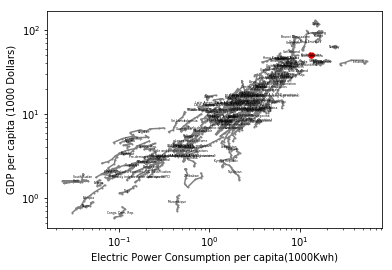

In [7]:
fig, ax = plt.subplots()
ax = plt.axes(xscale='log', yscale='log')
for key, grp in data_set.groupby('country'):
    plt.plot(grp.elepc, grp.gdppc, 'o-', markersize=1, color='gray')
    plt.annotate(key,
                data_set.loc[data_set['country']==key,['elepc','gdppc']].mean(),
                horizontalalignment='center',
                verticalalignment='center',
                size=3)
plt.plot(data_set[data_set['country']=='United States']['elepc'],
        data_set[data_set['country']=='United States']['gdppc'],
        'o-', markersize=3, color='red')
plt.xlabel("Electric Power Consumption per capita(1000Kwh)")
plt.ylabel("GDP per capita (1000 Dollars)")
fig.savefig('gdpele_country.png', format='png', dpi=300)

# Conduct OLS regression with/without fixed effects.

In [11]:
normal_ols = sm.ols(formula = 'gdppc ~ elepc', data = data_set).fit(cov_type='HC1')
print(normal_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     93.25
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.38e-21
Time:                        23:07:41   Log-Likelihood:                -7816.9
No. Observations:                1957   AIC:                         1.564e+04
Df Residuals:                    1955   BIC:                         1.565e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2972      0.897      9.248      0.0

In [10]:
panel_ols = sm.ols(formula = 'gdppc ~ elepc + C(country) + C(year)', data = data_set).fit(cov_type='HC1')
print(panel_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1192.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:07:12   Log-Likelihood:                -3948.8
No. Observations:                1957   AIC:                             8282.
Df Residuals:                    1765   BIC:                             9353.
Df Model:                         191                                         
Covariance Type:                  HC1                                         
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

/Users/wangqitong/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 191, but rank is 190
  'rank is %d' % (J, J_), ValueWarning)
